# TRANSFERÊNCIA DE CALOR E MECÂNICA DOS SÓLIDOS

In [32]:
#importando as bibilotecas
from math import *
from numpy import *
from matplotlib import pyplot as plt

## 1) 

A partir da forma geral da equação da energia para uma
superfície estendida, podemos observar que o proplema proposto trata-se de um problema em apena uma dimensao. Desta forma, deve-se analisar o comportamento da temperatura ao longo do comprimento da aleta.

## 2) Gráfico de Temperatura x Posição

In [23]:
# DEFINICAO DE PARAMETROS

tol = 1e-10
L = 300e-3

#densidade [kg/m3]
d = 2700 

# diametro e raio[m]
D = 5e-3
r = D/2

#perimetro e area
P = 2*pi*r
A = pi*r**2

#condutividade termica [W/mK]
k = 180

#calor especifico [J/KgK]
Cp = 896

# difusividade térmica  [m2/s]
alpha = k/(d*Cp) 

#Temperatura da base
Tb = 100

#Temperatura ambiente
Ta = 25

# coeficiente de conveccao [W/m2K]
h = 100

# intervalo espacial 11 nós
dx = 300e-3/10 

# intervalo temporal -> ate o erro zerar
dt = (dx**2)/(alpha*((h*P*(dx**2))/(k*A)+2))

# Criando intervalos 
x = arange(0, L+dx, dx) 
t = arange(0, 1000+dt, dt) 

In [24]:
#Temperatura
T = zeros((len(t),len(x))) # matriz[l][i]
T[:,0] = T[-1] = Tb
T[:,1:len(x)] = Ta

T

array([[100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       ...,
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.]])

In [25]:
len(t)

200

In [29]:
erro_final = 100

#while erro_final >= tol:
for l in range(1, len(t)):
    for i in range(1, len(x) -1):
        T[l,i] = (alpha*dt/dx**2)*(T[l-1,i+1] - 2*T[l-1,i] + T[l-1,i-1]) - ((h*P*alpha*dt)/(k*A))*(T[l-1,i] - Ta) +T[l-1,i]
    erro_final = max(abs((T[l,1:-1] - T[l-1,1:-1])/T[l,1:-1]))
    print(erro_final)
    if erro_final<tol:
        break
        
print(T[0])
print(T[1])
print(T[2])
#     erro_final = max(abs((T[l,1:-1] - T[l-1,1:-1])/T[l,1:-1]))
#     break
#     print(erro_final)
#     print('-------------------------------')
#     T = T_temp
    

0.5555555555555556
0.3424657534246577
0.17831669044222556
0.10627444312191815
0.08498082832513004
0.05445066682464637
0.04238485831114871
0.03202669643515043
0.022380693708024882
0.01870689078729785
0.013346474679862918
0.011040791609644067
0.008424445505988259
0.006601057372237045
0.005290326664956125
0.003993047292327992
0.0033183674284005455
0.0024458857836973627
0.002081557147874093
0.001568865615105215
0.001306148418672061
0.0010002324790534302
0.0008198472531333727
0.000635015117247333
0.0005147273541976917
0.0004019492365785211
0.0003232166995736168
0.00025388214490017143
0.00020298239664629368
0.0001601131709183904
0.00012748355182662537
0.0001008651610700686
8.007001616906115e-05
6.34903187255749e-05
5.029193868602644e-05
3.9941271621798285e-05
3.1588926867631145e-05
2.5116183110702695e-05
1.984158835462379e-05
1.5788939667484592e-05
1.2462959670458662e-05
9.923302953609742e-06
7.828308857169005e-06
6.2357671140441385e-06
4.91717852892278e-06
3.918077481530061e-06
3.0886222424

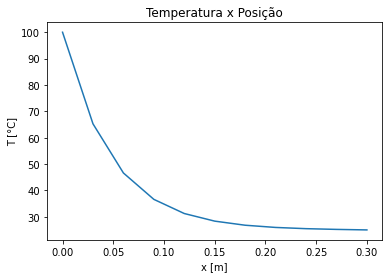

In [34]:
plt.plot(x, T[len(t)-1])
plt.title("Temperatura x Posição")
plt.xlabel("x [m]")
plt.ylabel("T [°C]")
plt.show()

In [35]:
m = sqrt((h*P)/(k*A))
sinh(2)
# x é posicao do no

3.6268604078470186

In [ ]:
def calcula_dist():
    (sinh(m(L-x)))/(sinh(m*L))